In [33]:
import torch
from torch import nn
import os
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath("/Users/puszkarb/phd/phd_nbeats_with_feature_vector"))
from networks import *
os.chdir(os.path.expanduser("~/phd/phd_nbeats_with_feature_vector"))


model_path="/Users/puszkarb/phd/phd_nbeats_with_feature_vector/models_repository/NBEATS_NBEATS_('I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6')_1734954128.8572166.th"

network_name="NBEATS"
alpha_hidden=7
alpha_layers=2
window_size=350
wavelet_features_size=185
alpha_input_size=350
beta_input_size=185
gamma_input_size=2298
delta_input_size=10

alpha_config = BranchConfig(network_name, alpha_hidden, alpha_layers, window_size, window_size, wavelet_features_size, beta_input_size=alpha_input_size)
beta_config = BranchConfig(network_name, alpha_hidden, alpha_layers, window_size, beta_input_size=beta_input_size)
gamma_config = BranchConfig(network_name, alpha_hidden, alpha_layers, window_size, beta_input_size=gamma_input_size, channels=1)
delta_config = BranchConfig(network_name, alpha_hidden, alpha_layers, window_size, beta_input_size=delta_input_size)

classes=['6374002', '10370003', '17338001', '39732003', '47665007', '59118001', '59931005',
                                '111975006', '164889003', '164890007', '164909002', '164917005', '164934002',
                                '164947007', '251146004', '270492004', '284470004', '365413008', '426177001', '426627000',
                                '426783006', '427084000', '427393009', '445118002', '698252002', '713426002']

leads=('I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6')

device=torch.device("cpu")

blend = get_MultibranchBeats(alpha_config, beta_config, gamma_config, delta_config, classes, device, leads )


| N-Beats, device=cpu
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=4200, forecast_length=26, share_thetas=False) at @5975858816
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=4200, forecast_length=26, share_thetas=False) at @5975950208
| N-Beats, device=cpu
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=2220, forecast_length=26, share_thetas=False) at @5975952800
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=2220, forecast_length=26, share_thetas=False) at @5975953184
| N-Beats, device=cpu
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=2298, forecast_length=26, share_thetas=False) at @5975951120
     | -- GenericBlock(units=7, thetas_dim=32, backcast_length=2298, forecast_length=26, share_thetas=False) at @5975955776
| N-Beats, device=cpu


In [17]:
blend.load_state_dict(torch.load(model_path, map_location="cpu")["model_state_dict"])

/var/folders/s0/_xpmvvhn2m73t94g0cm_cbzm0000gn/T/ipykernel_98131/2646062826.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  blend.load_state_dict(torch.load(model_path, 

<All keys matched successfully>

In [20]:
blend.parameters

<bound method Module.parameters of MultibranchBeats(
  (modelA): Nbeats_beta(
    (relu): ReLU()
    (nbeats_beta): NBeatsNet(
      (fc_linear): Linear(in_features=9100, out_features=26, bias=True)
      (parameters): ParameterList(
          (0): Parameter containing: [torch.float32 of size 7x4200]
          (1): Parameter containing: [torch.float32 of size 7]
          (2): Parameter containing: [torch.float32 of size 7x7]
          (3): Parameter containing: [torch.float32 of size 7]
          (4): Parameter containing: [torch.float32 of size 7x7]
          (5): Parameter containing: [torch.float32 of size 7]
          (6): Parameter containing: [torch.float32 of size 7x7]
          (7): Parameter containing: [torch.float32 of size 7]
          (8): Parameter containing: [torch.float32 of size 32x7]
          (9): Parameter containing: [torch.float32 of size 32]
          (10): Parameter containing: [torch.float32 of size 32x7]
          (11): Parameter containing: [torch.float32 o

In [23]:
for name, param in blend.named_parameters():
    print(name)
    print(param)

modelA.nbeats_beta.fc_linear.weight
Parameter containing:
tensor([[-0.0014,  0.0007,  0.0069,  ...,  0.0079, -0.0053,  0.0050],
        [-0.0089, -0.0060, -0.0097,  ...,  0.0020, -0.0102,  0.0017],
        [ 0.0086, -0.0023, -0.0023,  ...,  0.0042, -0.0029, -0.0026],
        ...,
        [-0.0016,  0.0046,  0.0053,  ...,  0.0013, -0.0011,  0.0105],
        [ 0.0022, -0.0037,  0.0056,  ..., -0.0048, -0.0099, -0.0084],
        [-0.0024, -0.0069,  0.0068,  ..., -0.0054, -0.0037, -0.0011]],
       requires_grad=True)
modelA.nbeats_beta.fc_linear.bias
Parameter containing:
tensor([ 7.9527e-03, -5.7589e-03,  9.4838e-03, -8.9466e-03, -1.8787e-03,
         6.3593e-03,  4.1483e-03, -6.4282e-03, -7.4834e-03, -9.7857e-03,
        -1.3287e-03, -4.8429e-03,  8.2458e-03, -4.6750e-03,  8.9184e-03,
         4.8427e-04,  2.6527e-03, -4.1387e-03,  8.4831e-05,  6.8898e-03,
         4.0626e-03, -2.7077e-03, -9.0193e-04, -2.9486e-03,  1.6934e-03,
         2.6461e-03], requires_grad=True)
modelA.nbeats_beta

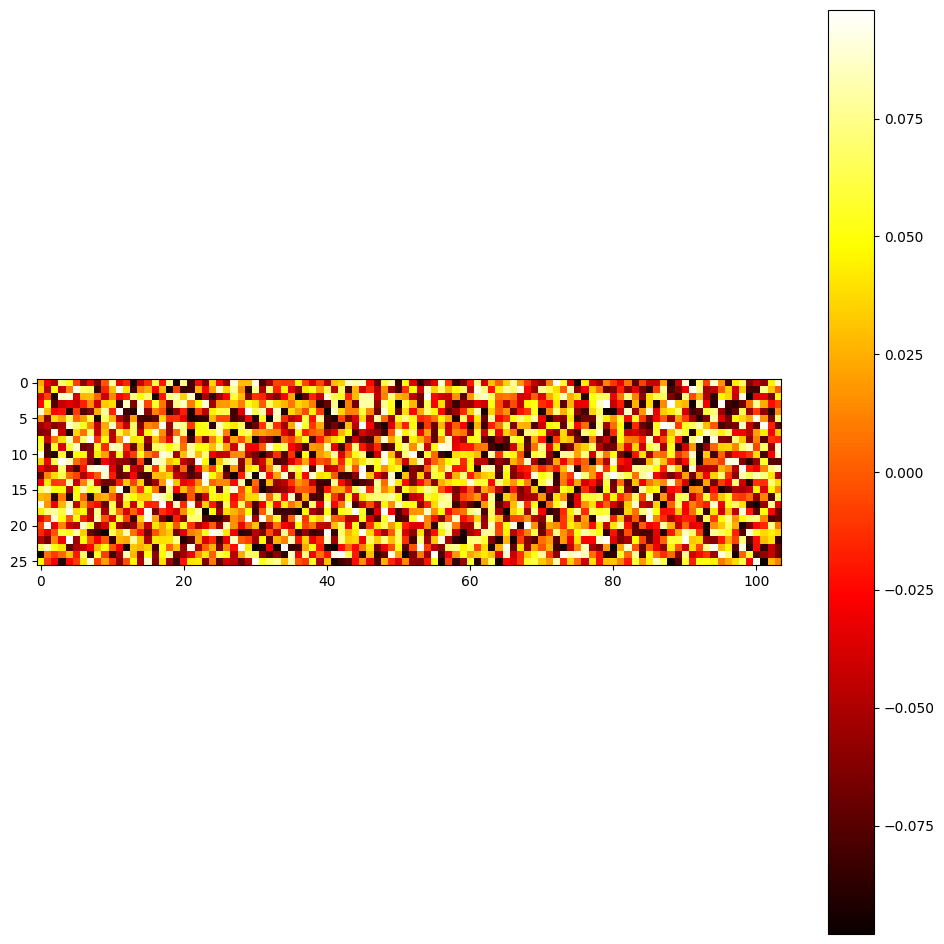

In [37]:
weights = blend.linear.weight.data.numpy()

heatmap = plt.imshow(weights, cmap='hot')
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
plt.colorbar(heatmap)
plt.show()

1.989417539909482
0.04472558945417404
0.5327849462628365
-0.6462219692766666


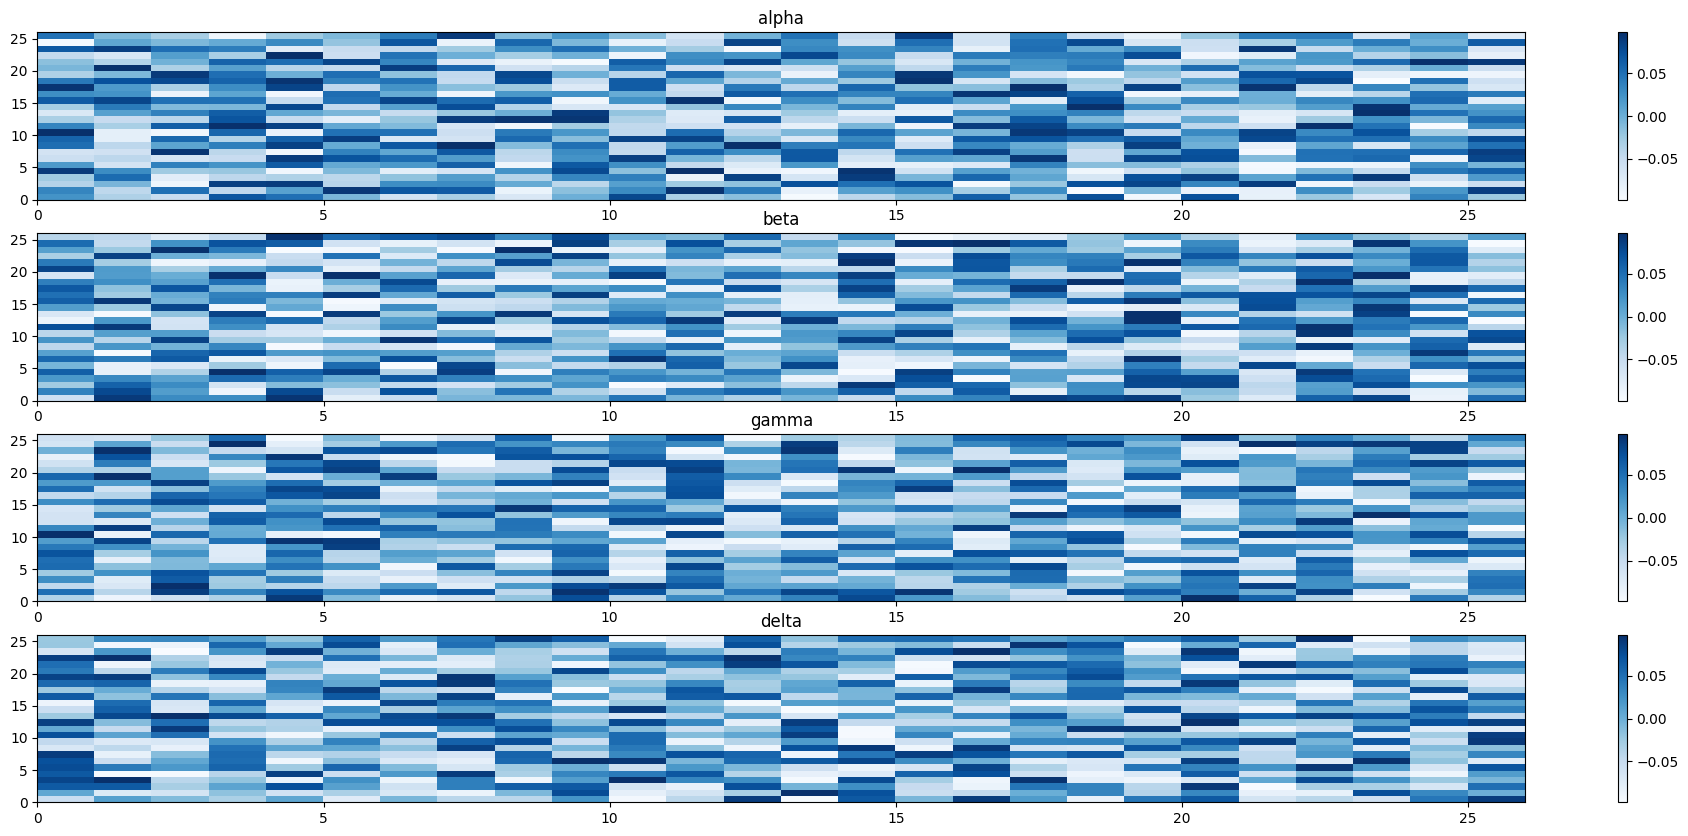

In [47]:
weights_alpha = weights[:, :26]
weights_beta = weights[:,26 :52]
weights_gamma = weights[:,52 :78]
weights_delta = weights[:,78 :]

names=["alpha", "beta", "gamma", "delta"]

figure, axis = plt.subplots(4, 1)
figure.set_size_inches(24,10)

for i in range(4):
    heatmap = axis[i].pcolor(weights[:, i*26:i*26 + 26], cmap=plt.cm.Blues)
    plt.colorbar(heatmap)
    axis[i].set_title(names[i])



for i in range(4):
    summed = sum(sum(weights[:, i*26:i*26 + 26]))
    print(summed)
    #axis[4+i].bar(range(26), summed)

    

